In [ ]:
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import plotly.graph_objects as go
from prettytable import PrettyTable

mpl.rcParams['figure.figsize'] = (12, 6)
mpl.rcParams['axes.grid'] = False

In [ ]:
# for colab
from google.colab import drive
drive.mount('/content/drive')
PATH = 'drive/My Drive/DLDF/data'
train = pd.read_csv(PATH + '/reg0_top6_data.csv', sep=';')
df = train

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
df

,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG
0,40369,309,19DEC2016,29.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,40370,309,19DEC2016,64.000000,NaN,NaN,NaN,NaN,NaN,NaN
2,40372,309,19DEC2016,32.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,40373,309,19DEC2016,10.000000,NaN,NaN,NaN,NaN,NaN,NaN
4,46272,309,19DEC2016,15.000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
35543,40370,1380,06JAN2020,11.551913,NaN,NaN,NaN,NaN,NaN,NaN
35544,40372,1380,06JAN2020,6.540984,NaN,NaN,NaN,NaN,NaN,NaN
35545,40373,1380,06JAN2020,4.398907,NaN,NaN,NaN,NaN,NaN,NaN
35546,46272,1380,06JAN2020,2.800000,NaN,NaN,NaN,NaN,NaN,NaN


# New dataset analyses

In [ ]:
df['date'] = pd.to_datetime(df.period_start_dt, format='%d%b%Y')
# log price
# df['PRICE_REGULAR'] = np.log(df.PRICE_REGULAR)
# date to 10^8 sec
df.date = df.date.astype(np.int64)/3600/24
df.date = df.date.astype(np.int64)/10**9

In [ ]:
period_starts = df.period_start_dt.unique()
period_starts

array(['19DEC2016', '26DEC2016', '02JAN2017', '09JAN2017', '16JAN2017',
       '23JAN2017', '30JAN2017', '06FEB2017', '13FEB2017', '20FEB2017',
       '27FEB2017', '06MAR2017', '13MAR2017', '20MAR2017', '27MAR2017',
       '03APR2017', '10APR2017', '17APR2017', '24APR2017', '01MAY2017',
       '08MAY2017', '15MAY2017', '22MAY2017', '29MAY2017', '05JUN2017',
       '12JUN2017', '19JUN2017', '26JUN2017', '03JUL2017', '10JUL2017',
       '17JUL2017', '24JUL2017', '31JUL2017', '07AUG2017', '14AUG2017',
       '21AUG2017', '28AUG2017', '04SEP2017', '11SEP2017', '18SEP2017',
       '25SEP2017', '02OCT2017', '09OCT2017', '16OCT2017', '23OCT2017',
       '30OCT2017', '06NOV2017', '13NOV2017', '20NOV2017', '27NOV2017',
       '04DEC2017', '11DEC2017', '18DEC2017', '25DEC2017', '01JAN2018',
       '08JAN2018', '15JAN2018', '22JAN2018', '29JAN2018', '05FEB2018',
       '12FEB2018', '19FEB2018', '26FEB2018', '05MAR2018', '12MAR2018',
       '19MAR2018', '26MAR2018', '02APR2018', '09APR2018', '16AP

In [ ]:
len(period_starts)

160

In [ ]:
dummy = df[ (df['period_start_dt'] == '19DEC2016') | 
            (df['period_start_dt'] == '19DEC2017') | 
            (df['period_start_dt'] == '19DEC2018') |
            (df['period_start_dt'] == '19DEC2019') |

            (df['period_start_dt'] == '26DEC2016') |
            (df['period_start_dt'] == '26DEC2017') |
            (df['period_start_dt'] == '26DEC2018') |
            (df['period_start_dt'] == '26DEC2019') |

            (df['period_start_dt'] == '06MAR2016') |
            (df['period_start_dt'] == '06MAR2017') |
            (df['period_start_dt'] == '06MAR2018') |
            (df['period_start_dt'] == '06MAR2019') |

            (df['period_start_dt'] == '20FEB2016') |
            (df['period_start_dt'] == '20FEB2017') |
            (df['period_start_dt'] == '20FEB2018') |
            (df['period_start_dt'] == '20FEB2019')  ]

In [ ]:
df['holiday_flag'] = np.where(df.index.isin(dummy.index), 1, 0)

In [ ]:
df[df.index.isin(dummy.index)]

,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,date,holiday_flag
0,40369,309,19DEC2016,29.0,NaN,NaN,NaN,NaN,NaN,NaN,17154.0,1
1,40370,309,19DEC2016,64.0,NaN,NaN,NaN,NaN,NaN,NaN,17154.0,1
2,40372,309,19DEC2016,32.0,NaN,NaN,NaN,NaN,NaN,NaN,17154.0,1
3,40373,309,19DEC2016,10.0,NaN,NaN,NaN,NaN,NaN,NaN,17154.0,1
4,46272,309,19DEC2016,15.0,NaN,NaN,NaN,NaN,NaN,NaN,17154.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32296,40369,1326,06MAR2017,416.0,0.0,0.0,500.0,500.0,0.0,1.0,17231.0,1
32297,40370,1326,06MAR2017,428.0,0.0,0.0,1000.0,1000.0,0.0,1.0,17231.0,1
32298,40372,1326,06MAR2017,129.0,0.0,0.0,2000.0,2000.0,0.0,1.0,17231.0,1
32299,40373,1326,06MAR2017,96.0,0.0,0.0,3000.0,3000.0,0.0,1.0,17231.0,1


In [ ]:
df = df.fillna(0)

In [ ]:
df

,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,date,holiday_flag
0,40369,309,19DEC2016,29.000000,0.0,0.0,0.0,0.0,0.0,0.0,17154.0,1
1,40370,309,19DEC2016,64.000000,0.0,0.0,0.0,0.0,0.0,0.0,17154.0,1
2,40372,309,19DEC2016,32.000000,0.0,0.0,0.0,0.0,0.0,0.0,17154.0,1
3,40373,309,19DEC2016,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,17154.0,1
4,46272,309,19DEC2016,15.000000,0.0,0.0,0.0,0.0,0.0,0.0,17154.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
35543,40370,1380,06JAN2020,11.551913,0.0,0.0,0.0,0.0,0.0,0.0,18267.0,0
35544,40372,1380,06JAN2020,6.540984,0.0,0.0,0.0,0.0,0.0,0.0,18267.0,0
35545,40373,1380,06JAN2020,4.398907,0.0,0.0,0.0,0.0,0.0,0.0,18267.0,0
35546,46272,1380,06JAN2020,2.800000,0.0,0.0,0.0,0.0,0.0,0.0,18267.0,0


In [ ]:
jan2020 = df[df['period_start_dt'].isin(['06JAN2020'])]

In [ ]:
jan2020.shape

(204, 12)

In [ ]:
jan2020_df = jan2020[['period_start_dt', 'demand', 'date', 'product_rk', 'store_location_rk']]

In [ ]:
jan2020_df

,period_start_dt,demand,date,product_rk,store_location_rk
938,06JAN2020,4.972678,18267.0,40369,317
939,06JAN2020,9.027322,18267.0,40370,317
940,06JAN2020,5.087432,18267.0,40372,317
941,06JAN2020,3.442623,18267.0,40373,317
942,06JAN2020,3.966667,18267.0,46272,317
...,...,...,...,...,...
35543,06JAN2020,11.551913,18267.0,40370,1380
35544,06JAN2020,6.540984,18267.0,40372,1380
35545,06JAN2020,4.398907,18267.0,40373,1380
35546,06JAN2020,2.800000,18267.0,46272,1380


In [ ]:
df = df.drop('period_start_dt', axis=1)

In [ ]:
df

,product_rk,store_location_rk,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,date,holiday_flag
0,40369,309,29.000000,0.0,0.0,0.0,0.0,0.0,0.0,17154.0,1
1,40370,309,64.000000,0.0,0.0,0.0,0.0,0.0,0.0,17154.0,1
2,40372,309,32.000000,0.0,0.0,0.0,0.0,0.0,0.0,17154.0,1
3,40373,309,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,17154.0,1
4,46272,309,15.000000,0.0,0.0,0.0,0.0,0.0,0.0,17154.0,1
...,...,...,...,...,...,...,...,...,...,...,...
35543,40370,1380,11.551913,0.0,0.0,0.0,0.0,0.0,0.0,18267.0,0
35544,40372,1380,6.540984,0.0,0.0,0.0,0.0,0.0,0.0,18267.0,0
35545,40373,1380,4.398907,0.0,0.0,0.0,0.0,0.0,0.0,18267.0,0
35546,46272,1380,2.800000,0.0,0.0,0.0,0.0,0.0,0.0,18267.0,0


# Working only with df.values

In [ ]:
uni_st_ids = df.store_location_rk.unique()
uni_sku_ids = df.product_rk.unique()

In [ ]:
uni_sku_ids

array([40369, 40370, 40372, 40373, 46272, 96212])

In [ ]:
uni_st_ids

array([ 309,  317,  355,  380,  425,  453,  504,  517,  525,  533,  535,
        540,  555,  557,  562,  637,  644,  657,  764,  798,  862,  866,
        874, 1005, 1034, 1079, 1080, 1143, 1162, 1173, 1185, 1191, 1202,
       1203, 1281, 1316, 1326, 1328, 1347, 1363, 1380])

In [ ]:
def split_dataset(df, store_ids, sku_ids, univar=False):
    batches = []
    for sku_id in sku_ids:
        for store_id in store_ids:
            if univar:
                batch = df[(df['store_location_rk'] == store_id) & (df['product_rk'] == sku_id)]['demand']
            else:
                batch = df[(df['store_location_rk'] == store_id) & (df['product_rk'] == sku_id)]
            batches.append(batch.values)
    return batches

In [ ]:
def split_dataset_other(df, sku_ids, demand_bool=False):
    batches = []
    for sku_id in sku_ids:
        batch = df[df['product_rk'] == sku_id]['demand']
        batches.append(batch.values)
    return np.array(batches)

In [ ]:
splitted_df = split_dataset(df, uni_st_ids, uni_sku_ids)

In [ ]:
for sh in split_dataset_other(df, uni_sku_ids):
    print(sh.shape)

(6109,)
(6109,)
(6108,)
(6109,)
(6103,)
(5010,)


In [ ]:
len(splitted_df)

246

In [ ]:
len(uni_sku_ids)*len(uni_st_ids)

246

In [ ]:
tmp = []
for idf in splitted_df:
    if idf.shape[0] == 160:
        tmp.append(idf)
splitted_df=tmp

In [ ]:
norm_sku_store = []
for idf in splitted_df:
    norm_sku_store.append(str(idf[0, 0])+str(idf[0, 1]))
norm_sku_store

['40369.0317.0',
 '40369.0355.0',
 '40369.0380.0',
 '40369.0425.0',
 '40369.0453.0',
 '40369.0504.0',
 '40369.0517.0',
 '40369.0525.0',
 '40369.0535.0',
 '40369.0555.0',
 '40369.0557.0',
 '40369.0562.0',
 '40369.0637.0',
 '40369.0644.0',
 '40369.0657.0',
 '40369.0764.0',
 '40369.0798.0',
 '40369.0862.0',
 '40369.0866.0',
 '40369.0874.0',
 '40369.01034.0',
 '40369.01079.0',
 '40369.01143.0',
 '40369.01162.0',
 '40369.01173.0',
 '40369.01185.0',
 '40369.01191.0',
 '40369.01203.0',
 '40369.01281.0',
 '40370.0317.0',
 '40370.0355.0',
 '40370.0380.0',
 '40370.0425.0',
 '40370.0453.0',
 '40370.0504.0',
 '40370.0517.0',
 '40370.0525.0',
 '40370.0535.0',
 '40370.0555.0',
 '40370.0557.0',
 '40370.0562.0',
 '40370.0637.0',
 '40370.0644.0',
 '40370.0657.0',
 '40370.0764.0',
 '40370.0798.0',
 '40370.0862.0',
 '40370.0866.0',
 '40370.0874.0',
 '40370.01034.0',
 '40370.01079.0',
 '40370.01143.0',
 '40370.01162.0',
 '40370.01173.0',
 '40370.01185.0',
 '40370.01191.0',
 '40370.01203.0',
 '40370.01281.

In [ ]:
len(norm_sku_store)
norm_sku_store

['40369.0317.0',
 '40369.0355.0',
 '40369.0380.0',
 '40369.0425.0',
 '40369.0453.0',
 '40369.0504.0',
 '40369.0517.0',
 '40369.0525.0',
 '40369.0535.0',
 '40369.0555.0',
 '40369.0557.0',
 '40369.0562.0',
 '40369.0637.0',
 '40369.0644.0',
 '40369.0657.0',
 '40369.0764.0',
 '40369.0798.0',
 '40369.0862.0',
 '40369.0866.0',
 '40369.0874.0',
 '40369.01034.0',
 '40369.01079.0',
 '40369.01143.0',
 '40369.01162.0',
 '40369.01173.0',
 '40369.01185.0',
 '40369.01191.0',
 '40369.01203.0',
 '40369.01281.0',
 '40370.0317.0',
 '40370.0355.0',
 '40370.0380.0',
 '40370.0425.0',
 '40370.0453.0',
 '40370.0504.0',
 '40370.0517.0',
 '40370.0525.0',
 '40370.0535.0',
 '40370.0555.0',
 '40370.0557.0',
 '40370.0562.0',
 '40370.0637.0',
 '40370.0644.0',
 '40370.0657.0',
 '40370.0764.0',
 '40370.0798.0',
 '40370.0862.0',
 '40370.0866.0',
 '40370.0874.0',
 '40370.01034.0',
 '40370.01079.0',
 '40370.01143.0',
 '40370.01162.0',
 '40370.01173.0',
 '40370.01185.0',
 '40370.01191.0',
 '40370.01203.0',
 '40370.01281.

In [ ]:
jan2020_df['code'] = jan2020_df['product_rk'].astype(str) + jan2020_df['store_location_rk'].astype(str)
jan2020_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,period_start_dt,demand,date,product_rk,store_location_rk,code
938,06JAN2020,4.972678,18267.0,40369,317,40369317
939,06JAN2020,9.027322,18267.0,40370,317,40370317
940,06JAN2020,5.087432,18267.0,40372,317,40372317
941,06JAN2020,3.442623,18267.0,40373,317,40373317
942,06JAN2020,3.966667,18267.0,46272,317,46272317
...,...,...,...,...,...,...
35543,06JAN2020,11.551913,18267.0,40370,1380,403701380
35544,06JAN2020,6.540984,18267.0,40372,1380,403721380
35545,06JAN2020,4.398907,18267.0,40373,1380,403731380
35546,06JAN2020,2.800000,18267.0,46272,1380,462721380


In [ ]:
jan_actual_df = jan2020_df[jan2020_df['code'].isin(norm_sku_store)]

In [ ]:
# WARNING: deprecated!
def create_one_hot(df, col_name):
    uni_cols = df[col_name].unique()
    df = pd.merge(df, pd.get_dummies(df[col_name], prefix=col_name), left_index=True, right_index=True)
    return df.drop(columns=col_name)

# df = create_one_hot(df, 'Store_id')
# df = create_one_hot(df, 'SKU_id')

In [ ]:
def make_ds(dataset, target_index=2, history_size=5, target_size=5, start_index=0, end_index=None):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    data.append(dataset[indices])
    # Reshape data from (history_size,) to (history_size, 1)
    # data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i: i+target_size, target_index])
  return np.array(data), np.array(labels)

Рассмотрим первую пару магазин-товар. 

Протестируем функцию для разделения датасета make_ds.


In [ ]:
x, y = make_ds(splitted_df[0])

In [ ]:
x.shape

(150, 5, 11)

In [ ]:
y.shape

(150, 5)

In [ ]:
x[5]

array([[4.0369e+04, 3.1700e+02, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        5.0000e+02, 5.0000e+02, 0.0000e+00, 1.0000e+00, 1.7189e+04,
        0.0000e+00],
       [4.0369e+04, 3.1700e+02, 1.6000e+01, 0.0000e+00, 0.0000e+00,
        5.0000e+02, 5.0000e+02, 0.0000e+00, 1.0000e+00, 1.7196e+04,
        0.0000e+00],
       [4.0369e+04, 3.1700e+02, 2.2000e+01, 0.0000e+00, 0.0000e+00,
        5.0000e+02, 5.0000e+02, 0.0000e+00, 1.0000e+00, 1.7203e+04,
        0.0000e+00],
       [4.0369e+04, 3.1700e+02, 6.8000e+01, 0.0000e+00, 0.0000e+00,
        5.0000e+02, 5.0000e+02, 0.0000e+00, 1.0000e+00, 1.7210e+04,
        0.0000e+00],
       [4.0369e+04, 3.1700e+02, 5.1000e+01, 0.0000e+00, 0.0000e+00,
        5.0000e+02, 5.0000e+02, 0.0000e+00, 1.0000e+00, 1.7217e+04,
        1.0000e+00]])

In [ ]:
# uni_train_mean = uni_data.mean()
# uni_train_std = uni_data.std()
# uni_data = (uni_data-uni_train_mean)/uni_train_std

In [ ]:
print ('Single window of past history')
print (x[0])
print ('\n Target demands to predict')
print (y[0])

Single window of past history
[[4.0369000e+04 3.1700000e+02 5.0000000e+01 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.7154000e+04
  1.0000000e+00]
 [4.0369000e+04 3.1700000e+02 6.5000000e+01 1.0000000e+00 0.0000000e+00
  5.0000000e+02 5.0000000e+02 0.0000000e+00 1.0000000e+00 1.7161000e+04
  1.0000000e+00]
 [4.0369000e+04 3.1700000e+02 4.1251366e+01 1.0000000e+00 0.0000000e+00
  5.0000000e+02 5.0000000e+02 0.0000000e+00 1.0000000e+00 1.7168000e+04
  0.0000000e+00]
 [4.0369000e+04 3.1700000e+02 1.3000000e+01 0.0000000e+00 0.0000000e+00
  5.0000000e+02 5.0000000e+02 0.0000000e+00 1.0000000e+00 1.7175000e+04
  0.0000000e+00]
 [4.0369000e+04 3.1700000e+02 1.1000000e+01 0.0000000e+00 0.0000000e+00
  5.0000000e+02 5.0000000e+02 0.0000000e+00 1.0000000e+00 1.7182000e+04
  0.0000000e+00]]

 Target demands to predict
[ 2. 16. 22. 68. 51.]


Preparing to feed NN

In [ ]:
def create_time_steps(length):
  return list(range(-length, 0))

In [ ]:
def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:, 1]), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()

In [ ]:
def show_plot(history, true_vals, preds=None):
    plt.figure(figsize=(24, 12))
    plt.xlim((0, len(history) + len(true_vals)))

    plt.plot(range(len(history)), history, label='History')
    plt.plot(range(len(history), len(history) + len(true_vals)), true_vals,  '.-', label='True')
    plt.plot(range(len(history), len(history) + len(true_vals)), preds, 'ro', label='Pred')
    # plt.xticks(labels=df.period_start_dt.unique()[:143])

    plt.legend(loc='upper left')
    plt.show()

In [ ]:
def baseline(history):
  return np.mean(history)

In [ ]:
x[:, 0, 2]

array([ 50.      ,  65.      ,  41.251366,  13.      ,  11.      ,
         2.      ,  16.      ,  22.      ,  68.      ,  51.      ,
       116.      , 404.      ,  12.      ,  12.      ,  15.      ,
         2.      ,   5.      ,  27.      ,  40.      ,  15.      ,
        20.      ,  18.      ,  20.      ,   8.      ,   5.      ,
        22.      ,   8.      ,  11.      ,   7.      ,  12.      ,
        16.      ,  14.      ,   5.      ,   1.      ,   9.      ,
         5.      ,  13.      ,   6.      ,  23.      ,  15.      ,
         6.      ,  11.      ,   3.      ,   4.      ,   5.      ,
         9.      ,   8.      ,  19.      ,   6.      ,   7.      ,
         8.      ,   3.      ,  22.      ,  62.      ,  29.289617,
         1.      ,  12.      ,   9.      ,   2.      ,   2.      ,
         7.      ,   8.      ,  29.      , 319.      ,  18.      ,
         6.      ,   2.      ,   2.      ,   4.      ,   3.      ,
         5.      ,   1.      ,   0.      ,   6.      ,   1.   

In [ ]:
# BATCH_SIZE = 64
# BUFFER_SIZE = 10000

# train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
# train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

# val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
# val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [ ]:
# batches = split_dataset(df, 3, 1)

In [ ]:
x[0].shape[-2:]

(5, 11)

In [ ]:
x.shape

(150, 5, 11)

# Training

In [ ]:
x, y = make_ds(splitted_df[0], target_size=12)


In [ ]:
x.shape

(143, 5, 11)

In [ ]:
y.shape

(143, 12)

In [ ]:
new_df = []
for df in splitted_df:
    if df.shape[0] == 160:
        new_df.append(df)

## **Simple LSTM**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(5, input_shape=x[0].shape[-2:], return_sequences=True),
    tf.keras.layers.LSTM(5, input_shape=x[0].shape[-2:]),
    tf.keras.layers.Dense(12)
    #tf.keras.layers.Dense(20),
    # tf.keras.layers.Dense(5)
])

model.compile(optimizer='adam', loss='mape')

In [ ]:
def train(df1):
    hist = []
    for df in df1:
        x1, y1 = make_ds(df, target_size=1)
        hist.append(model.train_on_batch(x1, y1))
    return hist

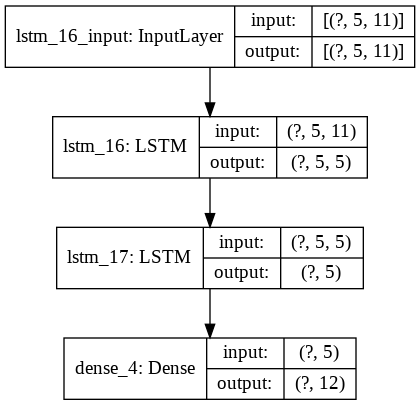

In [ ]:
from tensorflow.keras.utils import  plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
hist = train(new_df)

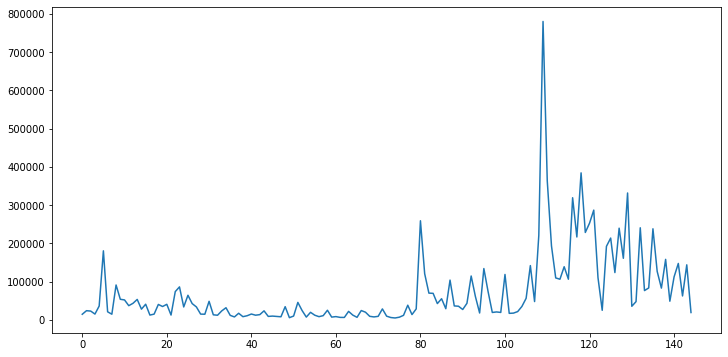

In [ ]:
tr = []
val = []

plt.plot(hist, label='tr')

plt.show()

## **LSTM with Attention**

In [ ]:
model_attention = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(5, input_shape=x[0].shape[-2:], return_sequences=True),
    tf.keras.layers.LSTM(5, input_shape=x[0].shape[-2:], return_sequences=True),
    tf.keras.layers.LSTM(5, input_shape=x[0].shape[-2:], return_sequences=True),
    tf.keras.layers.LSTM(5, input_shape=x[0].shape[-2:], return_sequences=True),
    tf.keras.layers.LSTM(5, input_shape=x[0].shape[-2:], return_sequences=True),
    tf.keras.layers.LSTM(5, input_shape=x[0].shape[-2:], return_sequences=True),
    tf.keras.layers.LSTM(5, input_shape=x[0].shape[-2:], return_sequences=True),
    tf.keras.layers.LSTM(5, input_shape=x[0].shape[-2:], return_sequences=True),
    tf.keras.layers.LSTM(5, input_shape=x[0].shape[-2:], return_sequences=True),
    tf.keras.layers.LSTM(5, input_shape=x[0].shape[-2:]),
    tf.keras.layers.Activation('softmax'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(12, activation='softmax')
])

In [ ]:
#train attention model
def train_attention(df1):
    hist = []
    for df in df1:
      x1, y1 = make_ds(df, target_size=1)
      hist.append(model.train_on_batch(x1, y1))
    return hist

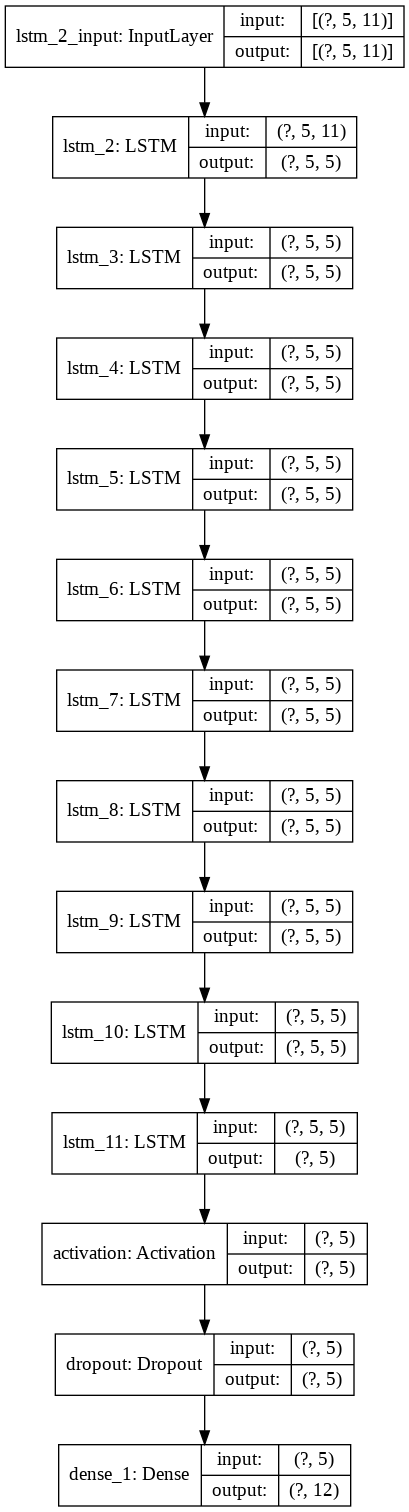

In [ ]:
# Plot attention model
from tensorflow.keras.utils import  plot_model
plot_model(model_attention, to_file='model_attention.png', show_shapes=True)

In [ ]:
# Attention model history
hist = train_attention(new_df)

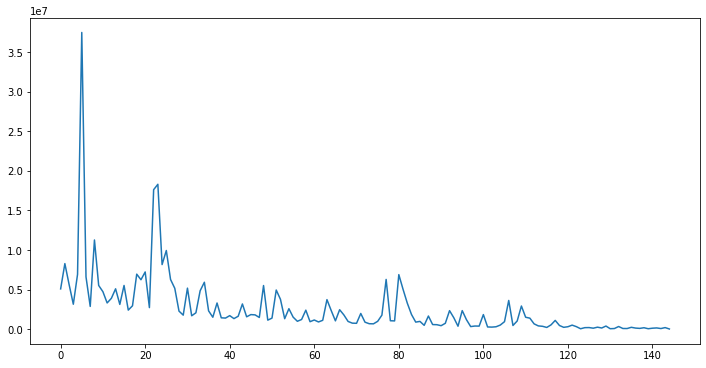

In [ ]:
tr = []
val = []

plt.plot(hist, label='tr')

plt.show()

# **Predictions**

In [ ]:
def plot_train_history(history, title=''):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

In [ ]:
def timeseries_graph(history, true_vals, preds=None, title_="Demand Forecast"):
    sample = np.zeros(len(history) + len(true_vals))
    for i in range(len(history)):
        sample[i] = history[i]
    for j in range(len(true_vals)):
        sample[j + len(history)] = true_vals[j]
    
    c = len(history)
    periods = period_starts[:len(history)+len(true_vals)]
    
    data_to_plot = pd.DataFrame()
    data_to_plot['1'] = pd.to_datetime(periods, format='%d%b%Y')
    data_to_plot['2'] = sample
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data_to_plot['1'][:c], 
                         y=data_to_plot['2'][:c], 
                         name="History",
                         line=dict(color='royalblue', width=1.5)
                        ))
    fig.add_trace(go.Scatter(x=data_to_plot['1'][c:], 
                         y=data_to_plot['2'][c:],
                         name="True",
                         line=dict(color='red', width=1.5)
                        ))
    fig.add_trace(go.Scatter(x=data_to_plot['1'][c:],
                         y=preds,
                         name="Predictions",
                         mode='markers',
                         marker=dict(color='orange')
                        ))
    fig.update_layout(title=title_,
                      xaxis_title="Date",
                      yaxis_title="Demand",
                      font=dict(family="Courier New, monospace", size=14, color="#7f7f7f"))
    fig.show()
    fig.write_html("file.html")

## **Simple LSTM**

In [ ]:
model.predict(x[:, 0][0:5].reshape(1,5,11))

array([[ 5.41293994e-05, -7.96318054e-04, -1.43468380e-03,
         1.03749335e-04,  1.10364007e-03,  4.71832231e-04,
        -6.74925745e-04,  1.70368701e-04, -1.31535856e-03,
         4.00308520e-04, -1.89114362e-03,  6.92758709e-04]], dtype=float32)

In [ ]:
x[:, 0][0:5].reshape(1,5,11)

array([[[4.0369000e+04, 3.1700000e+02, 5.0000000e+01, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 1.7154000e+04, 1.0000000e+00],
        [4.0369000e+04, 3.1700000e+02, 6.5000000e+01, 1.0000000e+00,
         0.0000000e+00, 5.0000000e+02, 5.0000000e+02, 0.0000000e+00,
         1.0000000e+00, 1.7161000e+04, 1.0000000e+00],
        [4.0369000e+04, 3.1700000e+02, 4.1251366e+01, 1.0000000e+00,
         0.0000000e+00, 5.0000000e+02, 5.0000000e+02, 0.0000000e+00,
         1.0000000e+00, 1.7168000e+04, 0.0000000e+00],
        [4.0369000e+04, 3.1700000e+02, 1.3000000e+01, 0.0000000e+00,
         0.0000000e+00, 5.0000000e+02, 5.0000000e+02, 0.0000000e+00,
         1.0000000e+00, 1.7175000e+04, 0.0000000e+00],
        [4.0369000e+04, 3.1700000e+02, 1.1000000e+01, 0.0000000e+00,
         0.0000000e+00, 5.0000000e+02, 5.0000000e+02, 0.0000000e+00,
         1.0000000e+00, 1.7182000e+04, 0.0000000e+00]]])

In [ ]:
pred_sample

array([[ 5.41293994e-05, -7.96318054e-04, -1.43468380e-03,
         1.03749335e-04,  1.10364007e-03,  4.71832231e-04,
        -6.74925745e-04,  1.70368701e-04, -1.31535856e-03,
         4.00308520e-04, -1.89114362e-03,  6.92758709e-04]], dtype=float32)

In [ ]:
x_sample, y_sample = make_ds(new_df[-1], target_size=12)
pred_sample = model.predict(x_sample[4].reshape(1,5,11))
timeseries_graph(x_sample[:, 1, 2], y_sample[-1], pred_sample.reshape(12,), \
                 "Demand forecast for SKU=46272, Store=128")

x_sample1, y_sample1 = make_ds(new_df[1], target_size=12)
pred_sample1 = model.predict(x_sample1[4].reshape(1,5,11))
timeseries_graph(x_sample1[:, 1, 2], y_sample1[-1], pred_sample1.reshape(12,), \
                 "Demand forecast for SKU=40369, Store=355")

x_sample2, y_sample2 = make_ds(new_df[50], target_size=12)
pred_sample2 = model.predict(x_sample2[4].reshape(1,5,11))
timeseries_graph(x_sample2[:, 1, 2], y_sample2[-1], pred_sample2.reshape(12,), \
                 "Demand forecast for SKU=40370, Store=1079")

In [ ]:
# predictions with smaller history

x_sample, y_sample = make_ds(new_df[-1], target_size=12)
pred_sample = model.predict(x_sample[4].reshape(1,5,11))
timeseries_graph(x_sample[:80, 1, 2], y_sample[80], pred_sample.reshape(12,), \
                 "Demand forecast for SKU=46272, Store=128")

x_sample1, y_sample1 = make_ds(new_df[1], target_size=12)
pred_sample1 = model.predict(x_sample1[4].reshape(1,5,11))
timeseries_graph(x_sample1[:80, 1, 2], y_sample1[80], pred_sample1.reshape(12,), \
                 "Demand forecast for SKU=40369, Store=355")

x_sample2, y_sample2 = make_ds(new_df[50], target_size=12)
pred_sample2 = model.predict(x_sample2[4].reshape(1,5,11))
timeseries_graph(x_sample2[:80, 1, 2], y_sample2[80], pred_sample2.reshape(12,), \
                 "Demand forecast for SKU=40370, Store=1079")

## **LSTM with Attention**

In [ ]:
x[:, 0][0:5].reshape(1,5,11)
x_sample, y_sample = make_ds(new_df[-1], target_size=12)
print(x_sample.shape)
pred_sample = model_attention.predict(x_sample[4].reshape(1,5,11))
timeseries_graph(x_sample[:, 1, 2], y_sample[-1], pred_sample.reshape(12,))

(143, 5, 11)


In [ ]:
x_sample, y_sample = make_ds(new_df[-1], target_size=12)
print(x_sample.shape)
pred_sample = model_attention.predict(x_sample[4].reshape(1,5,11))
timeseries_graph(x_sample[:80, 1, 2], y_sample[80], pred_sample.reshape(12,))

(143, 5, 11)


In [ ]:
x, y = make_ds(splitted_df[0], target_size=12)

In [ ]:
x = np.arange(0,10)

In [ ]:
x.reshape(1,10)

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [ ]:
y.shape

(143, 12)

In [ ]:
hist = model.fit(x, y, validation_split=0.7, epochs=134)

Epoch 1/134


ValueError: ignored

In [ ]:
len(new_df)

145

# Предсказания на начало 2020-го года. Неделя с 6-го января.


In [ ]:
jan_actual_df

,period_start_dt,demand,date,product_rk,store_location_rk,code


In [ ]:
df = pd.read_csv(PATH + '/reg0_top6_data.csv', sep=';')
df

,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG
0,40369,309,19DEC2016,29.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,40370,309,19DEC2016,64.000000,NaN,NaN,NaN,NaN,NaN,NaN
2,40372,309,19DEC2016,32.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,40373,309,19DEC2016,10.000000,NaN,NaN,NaN,NaN,NaN,NaN
4,46272,309,19DEC2016,15.000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
35543,40370,1380,06JAN2020,11.551913,NaN,NaN,NaN,NaN,NaN,NaN
35544,40372,1380,06JAN2020,6.540984,NaN,NaN,NaN,NaN,NaN,NaN
35545,40373,1380,06JAN2020,4.398907,NaN,NaN,NaN,NaN,NaN,NaN
35546,46272,1380,06JAN2020,2.800000,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dummy = df[ (df['period_start_dt'] == '19DEC2016') | 
            (df['period_start_dt'] == '19DEC2017') | 
            (df['period_start_dt'] == '19DEC2018') |
            (df['period_start_dt'] == '19DEC2019') |

            (df['period_start_dt'] == '26DEC2016') |
            (df['period_start_dt'] == '26DEC2017') |
            (df['period_start_dt'] == '26DEC2018') |
            (df['period_start_dt'] == '26DEC2019') |

            (df['period_start_dt'] == '06MAR2016') |
            (df['period_start_dt'] == '06MAR2017') |
            (df['period_start_dt'] == '06MAR2018') |
            (df['period_start_dt'] == '06MAR2019') |

            (df['period_start_dt'] == '20FEB2016') |
            (df['period_start_dt'] == '20FEB2017') |
            (df['period_start_dt'] == '20FEB2018') |
            (df['period_start_dt'] == '20FEB2019')  ]

In [ ]:
df['holiday_flag'] = np.where(df.index.isin(dummy.index), 1, 0)
df

,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,holiday_flag
0,40369,309,19DEC2016,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,1
1,40370,309,19DEC2016,64.000000,NaN,NaN,NaN,NaN,NaN,NaN,1
2,40372,309,19DEC2016,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,1
3,40373,309,19DEC2016,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,1
4,46272,309,19DEC2016,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
35543,40370,1380,06JAN2020,11.551913,NaN,NaN,NaN,NaN,NaN,NaN,0
35544,40372,1380,06JAN2020,6.540984,NaN,NaN,NaN,NaN,NaN,NaN,0
35545,40373,1380,06JAN2020,4.398907,NaN,NaN,NaN,NaN,NaN,NaN,0
35546,46272,1380,06JAN2020,2.800000,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
jan2020 = df[df['period_start_dt'].isin(['02DEC2019', '09DEC2019', '16DEC2019', '23DEC2019', '30DEC2019'])]

In [ ]:
jan2020

,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,holiday_flag
908,40369,317,02DEC2019,7.000000,0.0,0.0,500.00,500.0,0.0,1.0,0
909,40370,317,02DEC2019,6.000000,0.0,0.0,1000.00,1000.0,0.0,1.0,0
910,40372,317,02DEC2019,8.000000,0.0,0.0,2000.00,2000.0,0.0,1.0,0
911,40373,317,02DEC2019,5.000000,0.0,0.0,3000.00,3000.0,0.0,1.0,0
912,46272,317,02DEC2019,5.000000,1.0,0.0,284.29,199.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
35537,40370,1380,30DEC2019,101.595628,0.0,0.0,1000.00,1000.0,0.0,1.0,0
35538,40372,1380,30DEC2019,62.934426,0.0,0.0,2000.00,2000.0,0.0,1.0,0
35539,40373,1380,30DEC2019,26.622951,0.0,0.0,3000.00,3000.0,0.0,1.0,0
35540,46272,1380,30DEC2019,11.333333,1.0,0.0,284.29,199.0,0.0,1.0,0


In [ ]:
jan2020['code'] = jan2020['product_rk'].astype(str) + jan2020['store_location_rk'].astype(str)
jan_2020_x = jan2020[jan2020['code'].isin(norm_sku_store)]
# jan_2020_x = jan2020[jan2020['code'].loc(:, norm_sku_store)]
jan_2020_x['date'] = pd.to_datetime(jan_2020_x.period_start_dt, format='%d%b%Y')
# log price
# df['PRICE_REGULAR'] = np.log(df.PRICE_REGULAR)
# date to 10^8 sec
jan_2020_x.date = jan_2020_x.date.astype(np.int64)/3600/24
jan_2020_x.date = jan_2020_x.date.astype(np.int64)/10**9
jan_2020_x = jan_2020_x.drop('period_start_dt', axis=1)
jan_2020_x = jan_2020_x.drop('code', axis=1)
jan_2020_x

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,product_rk,store_location_rk,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,holiday_flag,date


In [ ]:
jan2020_x = split_dataset(jan_2020_x, uni_st_ids, uni_sku_ids)

In [ ]:
j20_x_cap = []
for df in jan2020_x:
    if df.shape[0] != 0:
        j20_x_cap.append(df)
j20_x_cap

[]

In [ ]:
len(j20_x_cap)

0

In [ ]:
j20_x_cap[0].shape

IndexError: ignored

In [ ]:
def predict_on_set(ds):
    preds = []
    for x in ds:
        preds.append(model.predict(x.reshape(1,5,11)))
    return preds

In [ ]:
preds = predict_on_set(j20_x_cap)

In [ ]:
new_pr = []
for pr in preds:
    new_pr.append(float(pr))
new_pr

In [ ]:
new_pr = pd.DataFrame(new_pr)

In [ ]:
new_pr.index=jan_actual_df.index

In [ ]:
new_pr

In [ ]:
answer = pd.concat([jan_actual_df, pd.DataFrame(new_pr)], axis=1)

In [ ]:
answer.to_csv('jan2020_pred.csv')

#Analyses



## **Perсentage error metrics**

In [ ]:
t = PrettyTable()
t.field_names = ['atomic level', 'aggregation level', 'METRIC_NAME']
t.add_row(['location|product', 'all locations|all products', '66 %'])
t.add_row(['all locations|product', 'all locations|all products', '30 %'])
print(t)

+-----------------------+----------------------------+-------------+
|      atomic level     |     aggregation level      | METRIC_NAME |
+-----------------------+----------------------------+-------------+
|    location|product   | all locations|all products |     66 %    |
| all locations|product | all locations|all products |     30 %    |
+-----------------------+----------------------------+-------------+


The metrics below receive the following data as input: 
- pd.DataFrame with columns Store_id, SKU_id, Week, Forecast, Actual, ForecastFlag(takes values 0 or 1)
- a list of stores **Location_group** for which we are building a forecast
- a list of goods **Product_group** for which we are building a forecast

The output of the metric calculation function prints the following table:


In [ ]:
def WAMAXPE(dataframe, Location_group, Product_group):
    
    #select the necessary products and shops, filter columns with ForecastFlag=1
    data = dataframe.copy()
    data = data.loc[data['Store_id'].isin(Location_group)]
    data = data.loc[data['SKU_id'].isin(Product_group)]
    data = data.loc[data['ForecastFlag'] == 1]

    #wamaxpe: atomic_level = location/product, aggregation_level = all_products/all_location
    data['diff'] = np.abs(data.Forecast - data.Actual)
    data['max'] = data[['Forecast', 'Actual']].max(axis=1)
    data1 = data.groupby(['Store_id', 'SKU_id']).agg({'diff':'sum', 'max':'sum'})
    wamaxpe1 = 100 * data1['diff'].sum() / data1['max'].sum()
   
    #wamaxpe: atomic_level = all_locations/product, aggregation_level = all_products/all_location
    data2 = data.groupby(['SKU_id']).agg({'Forecast':'sum', 'Actual':'sum'}).reset_index()
    wamaxpe2 = 100 * np.abs(data2.Forecast - 
                                          data2.Actual).sum() / data2[['Forecast', 'Actual']].max(axis=1).sum()
    
    t = PrettyTable()
    t.field_names = ['atomic level', 'aggregation level', 'WAMAXPE']
    t.add_row(['location|product', 'all locations|all products', f'{wamaxpe1} %'])
    t.add_row(['all locations|product', 'all locations|all products',f'{wamaxpe2} %'])

    print(t)

In [ ]:
def AVG_MAXPE(dataframe, Location_group, Product_group):
    
    data = dataframe.copy()
    data = data.loc[data['Store_id'].isin(Location_group)]
    data = data.loc[data['SKU_id'].isin(Product_group)]
    data = data.loc[data['ForecastFlag'] == 1]

    data['diff'] = np.abs(data.Forecast - data.Actual)
    data['max'] = data[['Forecast', 'Actual']].max(axis=1)
    data['fraction'] = data['diff'] / data['max']
    data1 = data.groupby(['Store_id', 'SKU_id']).agg({'fraction': 'sum'})
    avg_maxpe1 = 100 * data1['fraction'].sum() / len(data)
    
    data2 = data.groupby(['SKU_id']).agg({'Forecast':'sum', 'Actual':'sum'}).reset_index()
    data2['diff'] = np.abs(data2.Forecast - data2.Actual)
    data2['max'] = data2[['Forecast', 'Actual']].max(axis=1)
    data2['fraction'] = data2['diff'] / data2['max']
    avg_maxpe2 = 100 * data2['fraction'].sum() / len(data)
    
    t = PrettyTable()
    t.field_names = ['atomic level', 'aggregation level', 'AVG_MAXPE']
    t.add_row(['location|product', 'all locations|all products', f'{avg_maxpe1} %'])
    t.add_row(['all locations|product', 'all locations|all products',f'{avg_maxpe2} %'])
    
    print(t)

In [ ]:
def WAPE(dataframe, Location_group, Product_group):
    
    data = dataframe.copy()
    data = data.loc[data['Store_id'].isin(Location_group)]
    data = data.loc[data['SKU_id'].isin(Product_group)]
    data = data.loc[data['ForecastFlag'] == 1]
    
    data['diff'] = np.abs(data.Forecast - data.Actual)
    data1 = data.groupby(['Store_id', 'SKU_id']).agg({'diff':'sum', 'Actual':'sum'})
    wape1 = 100 * data1['diff'].sum() / data1['Actual'].sum()
    
    data2 = data.groupby(['SKU_id']).agg({'Forecast':'sum', 'Actual':'sum'}).reset_index()
    wape2 = 100 * np.abs(data2.Forecast - data2.Actual).sum() / data2['Actual'].sum()
    
    t = PrettyTable()
    t.field_names = ['atomic level', 'aggregation level', 'WAPE']
    t.add_row(['location|product', 'all locations|all products', f'{wape1} %'])
    t.add_row(['all locations|product', 'all locations|all products',f'{wape2} %'])

    print(t)

## **Bias - Over/Under estimation metrics**

These metrics take values in the range from -1 to 1. Negative values indicate under-forecasting, and positive values indicate over-forecasting.

The output of the metric calculation function prints the following table:


In [ ]:
t = PrettyTable()
t.field_names = ['atomic level', 'aggregation level', 'METRIC_NAME']
t.add_row(['location|product', 'all locations|all products', '-0.78'])
t.add_row(['all locations|product', 'all locations|all products', '-0.25'])
print(t)

+-----------------------+----------------------------+-------------+
|      atomic level     |     aggregation level      | METRIC_NAME |
+-----------------------+----------------------------+-------------+
|    location|product   | all locations|all products |    -0.78    |
| all locations|product | all locations|all products |    -0.25    |
+-----------------------+----------------------------+-------------+


$ AVG\_NFM = \frac{1}{n} \sum\limits_{Loc \in группаTT, Prod\in группаSKU}\sum\limits_{t}\frac{F^{Loc, Prod}_t - A^{Loc, Prod}_t}{F^{Loc, Prod}_t + A^{Loc, Prod}_t}$

In [ ]:
def AVG_NFM(dataframe, Location_group, Product_group):
    
    data = dataframe.copy()
    data = data.loc[data['Store_id'].isin(Location_group)]
    data = data.loc[data['SKU_id'].isin(Product_group)]
    data = data.loc[data['ForecastFlag'] == 1]
    
    data['fraction'] = (data.Forecast - data.Actual) / (data.Forecast + data.Actual)
    data1 = data.groupby(['Store_id', 'SKU_id']).agg({'fraction': 'sum'})
    avg_nfm1 = data1['fraction'].sum() / len(data1)
    
    data2 = data.groupby(['SKU_id']).agg({'Forecast':'sum', 'Actual':'sum'}).reset_index()
    data2['fraction'] = (data2.Forecast - data2.Actual) / (data2.Forecast + data2.Actual)
    avg_nfm2 = data2['fraction'].sum() / len(data2)
    
    t = PrettyTable()
    t.field_names = ['atomic level', 'aggregation level', 'AVG_NFM']
    t.add_row(['location|product', 'all locations|all products', f'{avg_nfm1}'])
    t.add_row(['all locations|product', 'all locations|all products',f'{avg_nfm2}'])
    
    print(t)

$Tracking\_signal = \frac{1}{n} \sum\limits_{Loc \in группаTT, Prod\in группаSKU}\sum\limits_{t}\frac{F^{Loc, Prod}_t - A^{Loc, Prod}_t}{|F^{Loc, Prod}_t - A^{Loc, Prod}_t|}$

In [ ]:
def Tracking_signal(dataframe, Location_group, Product_group):
    
    data = dataframe.copy()
    data = data.loc[data['Store_id'].isin(Location_group)]
    data = data.loc[data['SKU_id'].isin(Product_group)]
    data = data.loc[data['ForecastFlag'] == 1]
    
    data['fraction'] = (data.Forecast - data.Actual) / np.abs(data.Forecast - data.Actual)
    data1 = data.groupby(['Store_id', 'SKU_id']).agg({'fraction': 'sum'})
    avg_nfm1 = data1['fraction'].sum() / len(data)
    
    data2 = data.groupby(['SKU_id']).agg({'Forecast':'sum', 'Actual':'sum'}).reset_index()
    data2['fraction'] = (data2.Forecast - data2.Actual) / np.abs(data2.Forecast - data2.Actual)
    avg_nfm2 = data2['fraction'].sum() / len(data)
    
    t = PrettyTable()
    t.field_names = ['atomic level', 'aggregation level', 'AVG_NFM']
    t.add_row(['location|product', 'all locations|all products', f'{avg_nfm1}'])
    t.add_row(['all locations|product', 'all locations|all products',f'{avg_nfm2}'])
    
    print(t)

## **Simple LSTM**


In [ ]:
drive.mount('/content/drive')
PATH = 'drive/My Drive/DLDF/data'
preds_model_LSTM = pd.read_csv(PATH + '/jan2020_pred_LSTM.csv', sep=',') 
preds_model_LSTM.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,period_start_dt,demand,date,product_rk,store_location_rk,code,0
0,938,06JAN2020,4.972678,18267.0,40369,317,40369317,5.236743
1,939,06JAN2020,9.027322,18267.0,40370,317,40370317,5.236756
2,940,06JAN2020,5.087432,18267.0,40372,317,40372317,5.236751
3,941,06JAN2020,3.442623,18267.0,40373,317,40373317,7.230628
4,942,06JAN2020,3.966667,18267.0,46272,317,46272317,7.380250


In [ ]:
data_to_metrics = pd.DataFrame()
data_to_metrics['SKU_id'] = preds_model_LSTM['product_rk']
data_to_metrics['Store_id'] = preds_model_LSTM['store_location_rk']
data_to_metrics['Forecast'] = preds_model_LSTM['demand']
data_to_metrics['Actual'] = preds_model_LSTM['0']
data_to_metrics['ForecastFlag'] = 1

Location_group = data_to_metrics['Store_id'].unique()
Product_group = data_to_metrics['SKU_id'].unique()

In [ ]:
print("WAMAXPE")
WAMAXPE(data_to_metrics, Location_group, Product_group)
print("WAPE")
WAPE(data_to_metrics, Location_group, Product_group)
print("AVG_MAXPE")
AVG_MAXPE(data_to_metrics, Location_group, Product_group)

print("AVG_NFM")
AVG_NFM(data_to_metrics, Location_group, Product_group)
print("Tracking_signal")
Tracking_signal(data_to_metrics, Location_group, Product_group)

WAMAXPE
+-----------------------+----------------------------+---------------------+
|      atomic level     |     aggregation level      |       WAMAXPE       |
+-----------------------+----------------------------+---------------------+
|    location|product   | all locations|all products | 42.56860279716954 % |
| all locations|product | all locations|all products | 27.90816173382184 % |
+-----------------------+----------------------------+---------------------+
WAPE
+-----------------------+----------------------------+----------------------+
|      atomic level     |     aggregation level      |         WAPE         |
+-----------------------+----------------------------+----------------------+
|    location|product   | all locations|all products | 55.714500829432964 % |
| all locations|product | all locations|all products | 33.41497613453535 %  |
+-----------------------+----------------------------+----------------------+
AVG_MAXPE
+-----------------------+----------------------

In [ ]:
def timeseries_graph(history, true_vals, preds=None, title_="Demand Forecast"):
    sample = np.zeros(len(history) + len(true_vals))
    for i in range(len(history)):
        sample[i] = history[i]
    for j in range(len(true_vals)):
        sample[j + len(history)] = true_vals[j]
    
    c = len(history)
    periods = period_starts[:len(history)+len(true_vals)]
    
    data_to_plot = pd.DataFrame()
    data_to_plot['1'] = pd.to_datetime(periods, format='%d%b%Y')
    data_to_plot['2'] = sample
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data_to_plot['1'][:c], 
                         y=data_to_plot['2'][:c], 
                         name="History",
                         line=dict(color='royalblue', width=1.5)
                        ))
    fig.add_trace(go.Scatter(x=data_to_plot['1'][c:], 
                         y=data_to_plot['2'][c:],
                         name="True",
                         line=dict(color='red', width=1.5)
                        ))
    fig.add_trace(go.Scatter(x=data_to_plot['1'][c:],
                         y=preds,
                         name="Predictions",
                         mode='markers',
                         marker=dict(color='orange')
                        ))
    fig.update_layout(title=title_,
                      xaxis_title="Date",
                      yaxis_title="Demand",
                      font=dict(family="Courier New, monospace", size=14, color="#7f7f7f"))
    fig.show()
    fig.write_html("file.html")

In [ ]:
df = pd.read_csv(PATH + '/reg0_top6_data.csv', sep=';')
df

,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG
0,40369,309,19DEC2016,29.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,40370,309,19DEC2016,64.000000,NaN,NaN,NaN,NaN,NaN,NaN
2,40372,309,19DEC2016,32.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,40373,309,19DEC2016,10.000000,NaN,NaN,NaN,NaN,NaN,NaN
4,46272,309,19DEC2016,15.000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
35543,40370,1380,06JAN2020,11.551913,NaN,NaN,NaN,NaN,NaN,NaN
35544,40372,1380,06JAN2020,6.540984,NaN,NaN,NaN,NaN,NaN,NaN
35545,40373,1380,06JAN2020,4.398907,NaN,NaN,NaN,NaN,NaN,NaN
35546,46272,1380,06JAN2020,2.800000,NaN,NaN,NaN,NaN,NaN,NaN


# Обучение на всех парах магазин-товар

In [ ]:
x.shape

In [ ]:
train(model,x,y)

In [ ]:
for x, y in val_univariate.take(1):
    print(x)
    print(simple_lstm_model.predict(x))

In [ ]:
EVALUATION_INTERVAL = 200
EPOCHS = 30
simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50)

In [ ]:
for x, y in val_univariate.take(10):
  plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
  plot.show()

## Part 2: Forecast a multivariate time series

In [ ]:
sku1st1

In [ ]:
features_considered = sku1st1.columns[3:]

In [ ]:
features_considered

In [ ]:
features = sku1st1[features_considered]
features

In [ ]:
features.plot(subplots=True)

In [ ]:
dataset = features.values
data_mean = dataset.mean(axis=0)
data_std = dataset.std(axis=0)

In [ ]:
dataset = (dataset-data_mean)/data_std

In [ ]:
dataset[:, 1]

In [ ]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [ ]:
past_history = 35
future_target = 5
STEP = 1

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [ ]:
print ('Single window of past history : {}'.format(x_train_single[0].shape))

In [ ]:
print ('Single window of past history : {}'.format(y_train_single[0]))

In [ ]:
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [ ]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32,
                                           input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mse')

Let's check out a sample prediction.

In [ ]:
for x, y in val_data_single.take(1):
  print(single_step_model.predict(x).shape)

In [ ]:
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)

In [ ]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

In [ ]:
for x, y in val_data_single.take(10):
  plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]], 12,
                   'Single Step Prediction')
  plot.show()

In [ ]:
df_five_feat = sku1st1.values[:, 2:7]

past_history = 21
future_target = 0
STEP = 1

x_train_single, y_train_single = multivariate_data(df_five_feat, df_five_feat[:, 1], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(df_five_feat, df_five_feat[:, 1],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [ ]:
future_target = 72
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 1], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, 1],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

In [ ]:
print ('Single window of past history : {}'.format(x_train_multi[0].shape))
print ('\n Target temperature to predict : {}'.format(y_train_multi[0].shape))

In [ ]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [ ]:
def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:, 1]), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()

In [ ]:
for x, y in train_data_multi.take(1):
  multi_step_plot(x[0], y[0], np.array([0]))

In [ ]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,
                                          input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(72))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [ ]:
for x, y in val_data_multi.take(1):
  print (multi_step_model.predict(x).shape)

In [ ]:
multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=50)

In [ ]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

In [ ]:
for x, y in val_data_multi.take(3):
  multi_step_plot(x[0], y[0], multi_step_model.predict(x)[0])